<a href="https://colab.research.google.com/github/AlexanderSlokov/aiClassPracticeAssignments/blob/main/FuzzyControllerEx2TempCtrl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=00965a8c6845375d49bd908fbb1328b2bb4ed1528b64cc8fd21b0d8e8207074a
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [5]:
#add control about Temperature form 0 to 60 celcius degrees, the amount of Humidity form 0% to 100% || input use Atecedent command

temp = ctrl.Antecedent(np.arange(0,61,1),'temp')
humd = ctrl.Antecedent(np.arange(0,101,1),'humd')


In [6]:
#output is the fan's power level from 0 to 100 percents || output use Consequent command
fanPower = ctrl.Consequent(np.arange(0,101,1),'power')

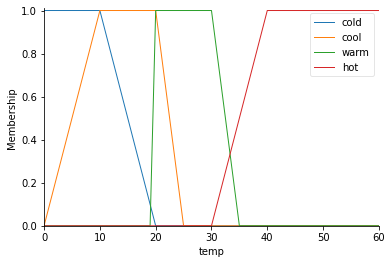

In [8]:
#create graph for TEMP || the universe simply take the var inside the array set on np.arange

temp['cold']=fuzz.trapmf(temp.universe,[0,0,10,20])
temp['cool']=fuzz.trapmf(temp.universe,[0,10,20,25])
temp['warm']=fuzz.trapmf(temp.universe,[20,20,30,35])
temp['hot']=fuzz.trapmf(temp.universe,[30,40,60,60])


#view the graph
temp.view()

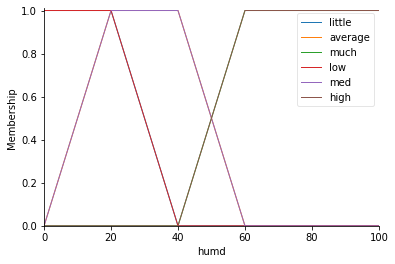

In [11]:
#create graph for HUMIDITY || the universe simply take the var inside the array set on np.arange
humd['low']=fuzz.trapmf(humd.universe,[0,0,20,40])
humd['med']=fuzz.trapmf(humd.universe,[0,20,40,60])
humd['high']=fuzz.trapmf(humd.universe,[40,60,100,100])

#view the graph
humd.view()

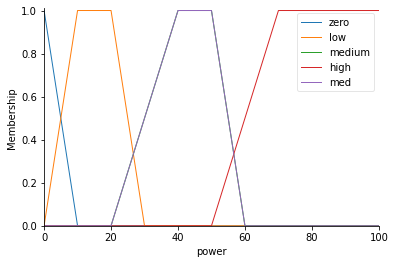

In [18]:
#create graph for FAN'S POWER|| the universe simply take the var inside the array set on np.arange
fanPower['zero']=fuzz.trimf(fanPower.universe,[0,0,10])
fanPower['low']=fuzz.trapmf(fanPower.universe,[0,10,20,30])
fanPower['med']=fuzz.trapmf(fanPower.universe,[20,40,50,60])
fanPower['high']=fuzz.trapmf(fanPower.universe,[50,70,100,100])

#view the graph
fanPower.view()

In [19]:
#set rules for controler
rule1=ctrl.Rule(temp['cold']&humd['high'],fanPower['high'])
rule2=ctrl.Rule(temp['cool']&humd['high'],fanPower['med'])
rule3=ctrl.Rule(temp['warm']&humd['high'],fanPower['low'])
rule4=ctrl.Rule(temp['hot']&humd['high'],fanPower['zero'])

rule5=ctrl.Rule(temp['cold']&humd['med'],fanPower['med'])
rule6=ctrl.Rule(temp['cool']&humd['med'],fanPower['low'])
rule7=ctrl.Rule(temp['warm']&humd['med'],fanPower['zero'])
rule8=ctrl.Rule(temp['hot']&humd['med'],fanPower['zero'])

rule9=ctrl.Rule(temp['cold']&humd['low'],fanPower['med'])
rule10=ctrl.Rule(temp['cool']&humd['low'],fanPower['low'])
rule11=ctrl.Rule(temp['warm']&humd['low'],fanPower['zero'])
rule12=ctrl.Rule(temp['hot']&humd['low'],fanPower['zero'])


In [20]:
#begin training, how many rules much tell
powering_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
powering = ctrl.ControlSystemSimulation(powering_control)

In [21]:
#input for testing
powering.input['temp'] = 32
powering.input['humd'] = 55

14.68873797396718


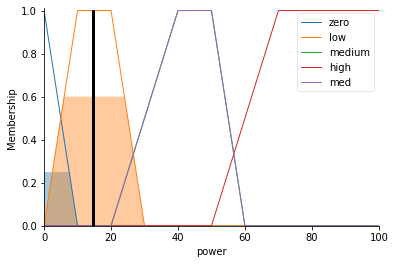

In [23]:
powering.compute()
print(powering.output['power'])
fanPower.view(sim=powering)